In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# ¡Vamos a poner en práctica lo aprendido!


Para ello vamos a utilizar un dataset de compras de supermercado, extraído desde el sitio web Kaggle

**Fuente: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales**


Además, te recomiendo tomar la documentación de Pandas e investigar algunas funciones y métodos propios de la librería para desarrollar la tarea.


Paso 1: Importar los datos usando

In [2]:
# Importar el archivo de datos
df


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,804-38-3935,A,Yangon,Member,Male,Electronic accessories,93.78,3.0,14.0670,295.4070,1/30/2019,11:32,Credit card,281.34,4.761905,14.0670,5.9
1,649-11-3678,C,Naypyitaw,Normal,Female,Food and beverages,22.93,9.0,10.3185,216.6885,2/26/2019,20:26,Cash,206.37,4.761905,10.3185,5.5
2,727-46-3608,B,Mandalay,Member,Female,Food and beverages,20.01,9.0,9.0045,189.0945,2/6/2019,15:47,Ewallet,180.09,4.761905,9.0045,4.1
3,102-06-2002,C,Naypyitaw,Member,Male,Sports and travel,25.25,5.0,6.3125,132.5625,3/20/2019,17:52,Cash,126.25,4.761905,6.3125,6.1
4,152-03-4217,B,Mandalay,Normal,Female,Home and lifestyle,11.28,9.0,5.0760,106.5960,3/17/2019,11:55,Credit card,101.52,4.761905,5.0760,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,102-77-2261,C,Naypyitaw,Member,Male,Health and beauty,65.31,7.0,22.8585,480.0285,3/5/2019,18:02,Credit card,457.17,4.761905,22.8585,4.2
998,434-35-9162,B,Mandalay,Member,Male,Food and beverages,23.34,4.0,4.6680,98.0280,2/4/2019,18:53,Ewallet,93.36,4.761905,4.6680,7.4
999,577-34-7579,C,Naypyitaw,Member,Male,Food and beverages,50.49,9.0,22.7205,477.1305,1/10/2019,17:16,Cash,454.41,4.761905,22.7205,5.4
1000,408-66-6712,C,Naypyitaw,Member,Female,Health and beauty,47.71,6.0,14.3130,300.5730,2/16/2019,14:19,Ewallet,286.26,4.761905,14.3130,4.4


Una buena práctica es chequear primero si el dataset cuenta con valores nulos. Estos por lo general son del tipo NaN y pueden generarnos errores el momento de analizar datos. Para ello utilizamos la función **isnull**.

**isnull** lo que hace es chequear mediante un booleano, **si es nulo** (1) o **no lo es** (0)

Por otra parte, **.sum()** lo que hace es sumar todos los valores para una determinada columna. Así con el código de abajo podemos saber si existen valores nulos y cuantos son.

In [5]:
#Chequeamos si existen valores nulos
print(df.isnull().sum())


Invoice ID                 2
Branch                     2
City                       2
Customer type              2
Gender                     2
Product line               2
Unit price                 2
Quantity                   2
Tax 5%                     2
Total                      2
Date                       2
Time                       2
Payment                    2
cogs                       2
gross margin percentage    2
gross income               2
Rating                     2
dtype: int64


In [6]:
#Eliminamos los valores nulos
df = df.dropna()
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,804-38-3935,A,Yangon,Member,Male,Electronic accessories,93.78,3.0,14.0670,295.4070,1/30/2019,11:32,Credit card,281.34,4.761905,14.0670,5.9
1,649-11-3678,C,Naypyitaw,Normal,Female,Food and beverages,22.93,9.0,10.3185,216.6885,2/26/2019,20:26,Cash,206.37,4.761905,10.3185,5.5
2,727-46-3608,B,Mandalay,Member,Female,Food and beverages,20.01,9.0,9.0045,189.0945,2/6/2019,15:47,Ewallet,180.09,4.761905,9.0045,4.1
3,102-06-2002,C,Naypyitaw,Member,Male,Sports and travel,25.25,5.0,6.3125,132.5625,3/20/2019,17:52,Cash,126.25,4.761905,6.3125,6.1
4,152-03-4217,B,Mandalay,Normal,Female,Home and lifestyle,11.28,9.0,5.0760,106.5960,3/17/2019,11:55,Credit card,101.52,4.761905,5.0760,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,102-77-2261,C,Naypyitaw,Member,Male,Health and beauty,65.31,7.0,22.8585,480.0285,3/5/2019,18:02,Credit card,457.17,4.761905,22.8585,4.2
998,434-35-9162,B,Mandalay,Member,Male,Food and beverages,23.34,4.0,4.6680,98.0280,2/4/2019,18:53,Ewallet,93.36,4.761905,4.6680,7.4
999,577-34-7579,C,Naypyitaw,Member,Male,Food and beverages,50.49,9.0,22.7205,477.1305,1/10/2019,17:16,Cash,454.41,4.761905,22.7205,5.4
1000,408-66-6712,C,Naypyitaw,Member,Female,Health and beauty,47.71,6.0,14.3130,300.5730,2/16/2019,14:19,Ewallet,286.26,4.761905,14.3130,4.4


2. Practicar consultas para encontrar datos.

Usualmente, cuando tenemos bases de datos nos interesa hacer consultas para conocer información de las tablas.

a. Cantidad promedio de compras (Columna Quantity)

Hint: Usar el método .mean()

5.51


b. Calcular el valor máximo de la columna Total

1042.65


c. Qué genero es la persona que hizo el máximo del total (parte b)

883    Female
Name: Gender, dtype: object

d. Desafio: ¿Cuál es la ciudad con mayores ventas totales? 

Hint: Investigar el método groupby


City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Total, dtype: float64

e. Grafica la columna Total y precio unitario 

Hint: Usar Scatter.

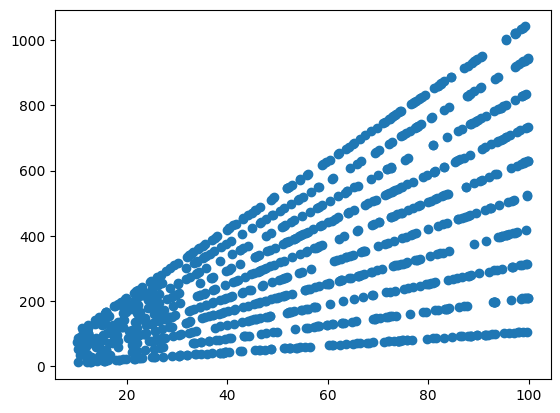